In [1]:

W_START: int = 5146
N: int = 10000
K_0: int = 13849
K_1: int = 25173
Q: int = 65536
ALPHA: float = 0.05

def linear_generator():
    i = 0
    w = W_START
    while i < Q:
        new_w = (K_1 * w + K_0) % Q
        yield new_w/Q
        w = new_w
        if i + 1 < Q:
            i += 1
        else:
            i = 0
            
gen = linear_generator()
results = [next(gen) for _ in range(N)] 

In [2]:
import numpy as np
from scipy.stats import chi2

m = int(np.log2(N) + 1)
observed_freq = {i: 0 for i in range(m)}
for val in results:
    idx = int(val * m)
    observed_freq[idx] += 1
    
# print(observed_freq)
expected_freq = len(results) / m

x_2 = sum([(np.pow((observed_freq[j] - expected_freq), 2)) / expected_freq for j in range(m)])
# print(x_2)

x_cr = chi2.ppf(1-ALPHA, m-1)
# print(x_cr)

print(f"Інтервалів: {m}")
print(f"Статистика X^2: {x_2}")
print(f"Ступенів свободи: {m-1}")
print(f"Критичне знач. X^2 при alpha=={ALPHA}: {x_cr}")
if x_2 <= x_cr:
    print("Розподіл рівномірний")
else:
    print("Розподіл нерівномірний")


Інтервалів: 14
Статистика X^2: 7.7796
Ступенів свободи: 13
Критичне знач. X^2 при alpha==0.05: 22.362032494826938
Розподіл рівномірний


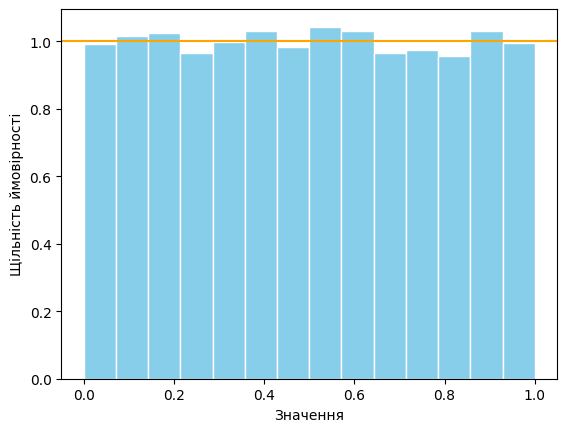

In [78]:
import matplotlib.pyplot as plt
plt.hist(results, bins=m, color='skyblue', edgecolor='white', range=(0,1), density=True,)
plt.xlabel('Значення')
plt.ylabel('Щільність ймовірності')
plt.axhline(1, color='orange')
plt.show()